# Player Tracking: Dataset Preparation

**SC549: Neural Networks - Programming Assignment 03**



## 1. Import Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
import pandas as pd

# For downloading videos (optional)
try:
    import yt_dlp
    YOUTUBE_AVAILABLE = True
except ImportError:
    print("yt-dlp not installed. You'll need to download videos manually.")
    YOUTUBE_AVAILABLE = False

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


## 2. Setup Paths

In [2]:
# Project directory structure
PROJECT_ROOT = Path('../')
DATA_DIR = PROJECT_ROOT / 'data'
VIDEOS_DIR = DATA_DIR / 'videos'
KEYPOINTS_VIDEOS_DIR = VIDEOS_DIR / 'keypoints_detection'
PLAYER_VIDEOS_DIR = VIDEOS_DIR / 'player_detection'
FRAMES_DIR = DATA_DIR / 'frames'
OUTPUTS_DIR = PROJECT_ROOT / 'outputs'

# Create directories if they don't exist
KEYPOINTS_VIDEOS_DIR.mkdir(parents=True, exist_ok=True)
PLAYER_VIDEOS_DIR.mkdir(parents=True, exist_ok=True)
FRAMES_DIR.mkdir(parents=True, exist_ok=True)
OUTPUTS_DIR.mkdir(parents=True, exist_ok=True)

print(f" Keypoints Detection Videos directory: {KEYPOINTS_VIDEOS_DIR}")
print(f" Player Detection Videos directory: {PLAYER_VIDEOS_DIR}")
print(f" Frames directory: {FRAMES_DIR}")
print(f" Outputs directory: {OUTPUTS_DIR}")

 Keypoints Detection Videos directory: ..\data\videos\keypoints_detection
 Player Detection Videos directory: ..\data\videos\player_detection
 Frames directory: ..\data\frames
 Outputs directory: ..\outputs


## 4. Analyze Videos

check what videos we have and their properties.

In [3]:
def get_video_info(video_path):
    """
    Extract information from a video file.
    
    Args:
        video_path (Path): Path to video file
    
    Returns:
        dict: Video properties (fps, frames, duration, resolution)
    """
    cap = cv2.VideoCapture(str(video_path))
    
    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frame_count / fps if fps > 0 else 0
    
    cap.release()
    
    return {
        'filename': video_path.name,
        'fps': fps,
        'frames': frame_count,
        'duration': round(duration, 2),
        'width': width,
        'height': height,
        'resolution': f"{width}x{height}"
    }

# Scan videos from both directories
keypoints_videos = list(KEYPOINTS_VIDEOS_DIR.glob('*.mp4')) + list(KEYPOINTS_VIDEOS_DIR.glob('*.avi'))
player_videos = list(PLAYER_VIDEOS_DIR.glob('*.mp4')) + list(PLAYER_VIDEOS_DIR.glob('*.avi'))
video_files = keypoints_videos + player_videos

if len(video_files) == 0:
    print("No videos found in keypoints_detection/ or player_detection/")
    print("Please add 5-10 sports videos (MP4 or AVI format)")
else:
    # Analyze each video
    video_info_list = []
    for video_path in video_files:
        info = get_video_info(video_path)
        # Add video type
        if video_path in keypoints_videos:
            info['type'] = 'keypoints'
        else:
            info['type'] = 'player'
        video_info_list.append(info)
    
    # Create a pandas DataFrame for nice display
    df_videos = pd.DataFrame(video_info_list)
    print(f"\n📹 Found {len(video_files)} video(s):\n")
    print(df_videos.to_string(index=False))
    
    # Check if videos meet requirements
    print("\nChecking requirements:")
    valid_count = 0
    for info in video_info_list:
        if 5 <= info['duration'] <= 10:
            valid_count += 1
            print(f"  ✓ {info['filename']} ({info['type']}): {info['duration']}s (valid)")
        else:
            print(f"  ⚠ {info['filename']} ({info['type']}): {info['duration']}s (should be 5-10s)")
    
    print(f"\n{valid_count}/{len(video_files)} videos meet the 5-10 second requirement")
    if valid_count >= 5:
        print("Dataset requirement satisfied!")
    else:
        print(f"Need at least {5 - valid_count} more valid videos")


📹 Found 10 video(s):

          filename  fps  frames  duration  width  height resolution      type
input_video_10.mp4   30     307     10.23   1280     720   1280x720 keypoints
 input_video_6.mp4   25     184      7.36   1280     720   1280x720 keypoints
 input_video_7.mp4   25     267     10.68   3840    2160  3840x2160 keypoints
 input_video_8.mp4   30     318     10.60   1280     720   1280x720 keypoints
 input_video_9.mp4   30     268      8.93   1280     720   1280x720 keypoints
 input_video_1.mp4   30     297      9.90   1920    1080  1920x1080    player
 input_video_2.mp4   24     240     10.00    848     480    848x480    player
 input_video_3.mp4   60     644     10.73    848     480    848x480    player
 input_video_4.mp4   25     250     10.00   1920    1080  1920x1080    player
 input_video_5.mp4   25     240      9.60   1280     720   1280x720    player

Checking requirements:
  ⚠ input_video_10.mp4 (keypoints): 10.23s (should be 5-10s)
  ✓ input_video_6.mp4 (keypoints):

## 5. Display Sample Frames

visualize the first frame of each video to understand our dataset.

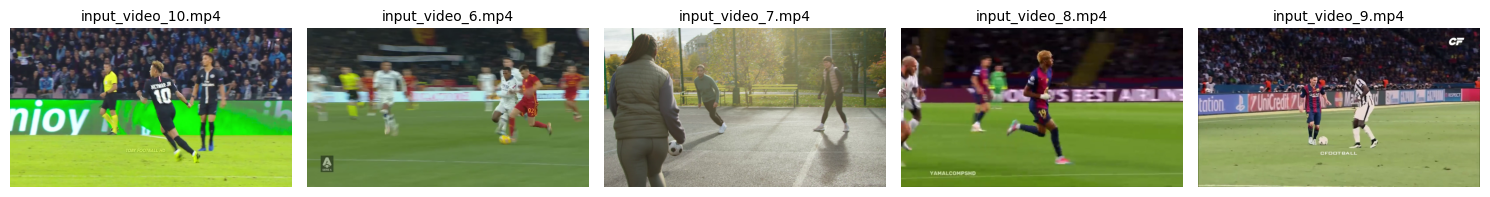

Saved: outputs/screenshots/sample_frames.png


In [5]:
def show_sample_frames(video_files, num_videos=5):
    """
    Display the first frame from each video.
    
    Args:
        video_files (list): List of video file paths
        num_videos (int): Maximum number of videos to display
    """
    num_videos = min(len(video_files), num_videos)
    
    fig, axes = plt.subplots(1, num_videos, figsize=(15, 3))
    if num_videos == 1:
        axes = [axes]
    
    for i, video_path in enumerate(video_files[:num_videos]):
        # Read first frame
        cap = cv2.VideoCapture(str(video_path))
        ret, frame = cap.read()
        cap.release()
        
        if ret:
            # Convert BGR to RGB for matplotlib
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Display
            axes[i].imshow(frame_rgb)
            axes[i].set_title(video_path.name, fontsize=10)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.savefig(OUTPUTS_DIR / 'screenshots' / 'sample_frames.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Saved: outputs/screenshots/sample_frames.png")

if len(video_files) > 0:
    # Create screenshots directory
    (OUTPUTS_DIR / 'screenshots').mkdir(parents=True, exist_ok=True)
    show_sample_frames(video_files)
else:
    print("No videos to display")

## 6. Extract Frames from Videos

Extract frames to work with individual images.

**In this step , extract frames for**
- Easier to process individual images
- Can apply detection frame-by-frame
- Helpful for debugging and visualization

In [6]:
def extract_frames(video_path, output_dir, sample_rate=1):
    """
    Extract frames from a video file.
    
    Args:
        video_path (Path): Path to video file
        output_dir (Path): Directory to save frames
        sample_rate (int): Extract every Nth frame (1 = all frames)
    
    Returns:
        int: Number of frames extracted
    """
    # Create output directory for this video
    video_name = video_path.stem  # Filename without extension
    frames_output = output_dir / video_name
    frames_output.mkdir(parents=True, exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(str(video_path))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Processing: {video_path.name}")
    
    extracted = 0
    frame_idx = 0
    
    # Progress bar
    pbar = tqdm(total=frame_count, desc=f"Extracting frames")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Save every Nth frame
        if frame_idx % sample_rate == 0:
            frame_filename = frames_output / f"frame_{frame_idx:06d}.jpg"
            cv2.imwrite(str(frame_filename), frame)
            extracted += 1
        
        frame_idx += 1
        pbar.update(1)
    
    cap.release()
    pbar.close()
    
    print(f"  Extracted {extracted} frames to {frames_output}")
    return extracted

# Extract frames from all videos
if len(video_files) > 0:
    print("Extracting frames from all videos...\n")
    
    total_frames = 0
    for video_path in video_files:
        num_frames = extract_frames(video_path, FRAMES_DIR, sample_rate=1)
        total_frames += num_frames
        print()
    
    print(f"\nTotal frames extracted: {total_frames}")
    print(f"Frames saved in: {FRAMES_DIR}")
else:
    print("No videos to process")

Extracting frames from all videos...

Processing: input_video_10.mp4


Extracting frames: 100%|███████████████████████████████████████████████████████████████| 307/307 [00:04<00:00, 67.87it/s]


  Extracted 307 frames to ..\data\frames\input_video_10

Processing: input_video_6.mp4


Extracting frames: 100%|███████████████████████████████████████████████████████████████| 184/184 [00:02<00:00, 81.88it/s]


  Extracted 184 frames to ..\data\frames\input_video_6

Processing: input_video_7.mp4


Extracting frames: 100%|███████████████████████████████████████████████████████████████| 267/267 [00:24<00:00, 10.95it/s]


  Extracted 267 frames to ..\data\frames\input_video_7

Processing: input_video_8.mp4


Extracting frames: 100%|███████████████████████████████████████████████████████████████| 318/318 [00:03<00:00, 91.75it/s]


  Extracted 318 frames to ..\data\frames\input_video_8

Processing: input_video_9.mp4


Extracting frames: 100%|██████████████████████████████████████████████████████████████| 268/268 [00:02<00:00, 118.98it/s]


  Extracted 268 frames to ..\data\frames\input_video_9

Processing: input_video_1.mp4


Extracting frames: 100%|███████████████████████████████████████████████████████████████| 297/297 [00:05<00:00, 53.49it/s]


  Extracted 297 frames to ..\data\frames\input_video_1

Processing: input_video_2.mp4


Extracting frames: 100%|██████████████████████████████████████████████████████████████| 240/240 [00:01<00:00, 146.79it/s]


  Extracted 240 frames to ..\data\frames\input_video_2

Processing: input_video_3.mp4


Extracting frames: 100%|██████████████████████████████████████████████████████████████| 644/644 [00:03<00:00, 166.12it/s]


  Extracted 644 frames to ..\data\frames\input_video_3

Processing: input_video_4.mp4


Extracting frames: 100%|███████████████████████████████████████████████████████████████| 250/250 [00:10<00:00, 23.78it/s]


  Extracted 250 frames to ..\data\frames\input_video_4

Processing: input_video_5.mp4


Extracting frames: 100%|███████████████████████████████████████████████████████████████| 240/240 [00:04<00:00, 54.90it/s]

  Extracted 240 frames to ..\data\frames\input_video_5


Total frames extracted: 3015
Frames saved in: ..\data\frames


## 7. Dataset Summary

In [7]:
# Count total frames extracted
total_frames = sum(len(list(d.glob('*.jpg'))) for d in FRAMES_DIR.iterdir() if d.is_dir())

print(" Dataset Summary")
print("=" * 50)
print(f"Total videos: {len(video_files)}")
print(f"Total frames: {total_frames}")
print(f"Frames location: {FRAMES_DIR}")
print(f"Outputs location: {OUTPUTS_DIR}")
print("=" * 50)

if len(video_files) >= 5:
    print("\nDataset ready for model training!")
    print("\n Next step: Open notebook 02_player_detection.ipynb")
else:
    print(f"\n  Need {5 - len(video_files)} more videos to meet requirements")
    print("Please add more sports videos to data/videos/")

 Dataset Summary
Total videos: 10
Total frames: 3015
Frames location: ..\data\frames
Outputs location: ..\outputs

Dataset ready for model training!

 Next step: Open notebook 02_player_detection.ipynb
